# Discrete & Continuous


## Combinatorics
1. Subsets, Permutations, Combination, Enumeration枚举(Counting & Choosing) and Brute Force, Equivalence, discrete probability(Hash Functions), Inclusion-Exclusion and Random Mappings, 
1. Generating Functions and Asymptotic渐进 Enumeration(Recursive), Bivariate Generating Functions and Combinatorial Statistics(Discrete approach to Statistics/Probability through combinatorics .VS. continuous - Measure theory), Orthogonal Arrays

1. Subsets of a Set
    1. A set with n elements has $\sum_{k=0}^{n} \tbinom{n}{k} = 2^n$ subsets, and $ (0 \leq k \leq n)$
        - e.g. the k=3 row of Pascal's Triangle is: 1,3,3,1 (corresponding to $\tbinom{3}{0} {3\choose 1} {3\choose 2} {3\choose 3}$
        - Sum of n-th row of Pascal’s Triangle is $2^n$

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/binomial_coeff2.png" alt="Binomial2Normal" width="700">

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/binomial_coeff1.png" alt="Binomial_Triangle" width="600">


Manipulate[ListPlot[Table[{y, Binomial[x, y]}, {y, 0, x}], Joined -> False, 
 
>    PlotStyle -> {Blue, PointSize[Large]}, Filling -> Axis, AxesOrigin -> {0, 0}, 
 
>    Frame -> True, FrameLabel -> {Degree, Coefficient}, PlotRange -> All, 
 
>    GridLines -> Automatic, PlotLabel -> 
 
>     Binomial Coefficients for Degree x = <>ToString[x]], {{x, 20}, 1, 36, 1}, 
 
>   SaveDefinitions -> True]
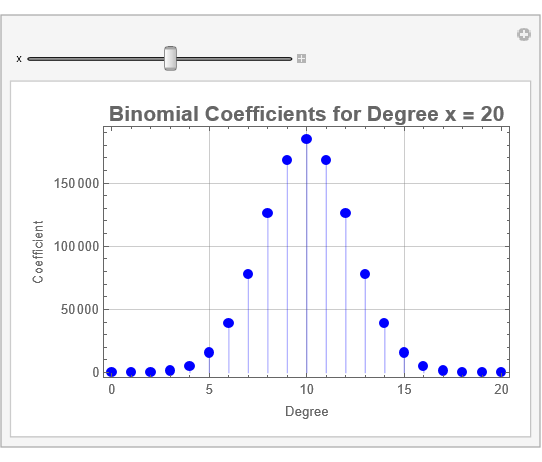

In [ ]:
Manipulate[
  ListPlot[ Table[{y, Binomial[x, y]}, {y, 0, x}],
    Joined -> False,
    PlotStyle -> {Blue, PointSize[Large]},
    Filling -> Axis,      (* Adds vertical lines to the axis *)
    AxesOrigin -> {0, 0}, (* Ensures the axes start at zero *)
    Frame -> True,        (* Adds frame for better appearance *)
    FrameLabel -> {"Degree", "Coefficient"}, (* Proper labels *)
    PlotRange -> All,
    GridLines -> Automatic, (* Adds grid lines for better readability *)
    PlotLabel -> Style["Binomial Coefficients for Degree x = " <> ToString[x], Bold, 16]
          ],
          {{x, 20}, 1, 36, 1}, (* Slider for degree x, matching graph range *)
          SaveDefinitions -> True ]

1. Binomial go to Fibonacci sequences

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/binomial_fibonacci.png" alt="Binomial_Fibonacci" width="500">

### Enumeration using Asymptotic

Asymptotic enumeration methods provide quantitative information about the growth rate of functions that count combinatorial objects.

## Recursion, Difference Equation & Generating Function

### Difference equation & Recursion/Recurrence

- Recursion is a logic idea (non-computational) - Intuition: 1 老和尚故事 2 镜子互照 3 fibonnaci
- Recursion Schemes structurally implement the idea (computational), relying on higher-order functions (fold, unfold). Higher-order functions nested in DE, so RS can model numerical solutions, approximations, or symbolic computations

Recursion .VS. Calculus? 
- Recursion is essentially just discrete DEs, you discretize DE in order to solve it numerically you will end up with a difference equations or Calculus of Finite Difference - Wiki

| | | |
|---|----------|-------|
| Catamorphism | fold, recursively reducing a data structure into a single value, like solving an integral or differential equation, where an initial state evolves iteratively | e.g. Euler Method |
| Anamorphism  | unfold, recursively builds a structure. generating sequences from DE | e.g. creating Taylor series |
| Hylomorphism | fold+unfold, generates a structure and immediately reduces it | E.g. Runge-Kutta Method |
| Paramorphism | fold, extension of catamorphism, maintain both the current approximation result and all previous steps | e.g. Euler Method |

DP (Dynamic Programming) .VS. Recursion ? Imagine climbing a mountain:
- **Recursion** (essentially difference equation) is like taking a step, then another step, and another, until you reach the top. 
- **DP** is like remembering (memoization or dynamic tabulation) which steps you've already taken, so you don't have to repeat them.

DP .VS. Math?
- In the context of dynamic programming, the Bellman equation (or a difference equation) captures the problem structure in a mathematical form. 
- [Bellman equation](https://en.wikipedia.org/wiki/Bellman_equation) is the recursion that defines how to calculate the optimal value at a particular stage based on the optimal values of the preceding stages. 

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/bellmanequation1.png" alt="Bellmanequation" width="700">

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/bellmanequation2.png" alt="Bellmanequation" width="500">

> DP, go to [Project Euler Q31](../10pe/PE50.ipynb#pe-31) e.g. 最长递增子序列、最小编辑距离、背包问题、凑零钱问题

- Identify the overlapping subproblems: The first step is to identify smaller, overlapping subproblems by enumerate.
- Define the recurrence relation: in subproblems, define a recurrence relation that bridges the solution(to a larger problem) and solutions(of smaller subproblems).
- Implement DP solution: implement DP using either top-down or bottom-up approaches.
- Optimize solution: optimize solution by using memoization or tabulation to avoid redundant calculations.


### Generating Function 

Generating Function (GF) is bridge between **difference** equations and **differential** equations
- GF encode sequences where each term often relates to previous terms (difference equation), so Generating Functions are Essentially Difference Equations
- The transformation to the GF often "smooths" these discrete relationships, allowing them to be analyzed as continuous functions that satisfy differential equations.

In [3]:
# Expand a GF
f=(1+x+x^2+x^3+x^4+x^5)^2*(x^2+x^3+x^4+x^5+x^6)/(1-x)
s(taylor(f,x,0,10))

# compute coeff of x^n/n! in an exponential GF (e^x):
f=exp(x)
# If a_n is the coefficient of x^n, then n!⋅a_n is the coefficient of x^n/n!
g=f.taylor(x,0,13)  # expand its first 13 terms of the Taylor series
L=g.coefficients()  # extract the coefficients
coeffs={c[1]:c[0]*factorial(c[1]) for c in L} # multiply by the factorial to get coeff part

# coeffs is now a "dictionary" that holds pairs n:m,
# n is the exponent and m is the coefficient. Note that
# coefficients with value zero are not included.
coeffs

<IPython.core.display.Math object>

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1}

In [4]:
# Expanding a bivariate exponential GF
def egfExpand2(f, size):
    y = polygen(QQ, "y")
    x = LazyPowerSeriesRing(y.parent(), "x").gen()
    return [list(f(x, y)[n] * factorial(n)) for n in range(size)]

f = lambda x, y: exp(x * y) * sec(x)
egfExpand2(f, 10)

[[1],
 [0, 1],
 [1, 0, 1],
 [0, 3, 0, 1],
 [5, 0, 6, 0, 1],
 [0, 25, 0, 10, 0, 1],
 [61, 0, 75, 0, 15, 0, 1],
 [0, 427, 0, 175, 0, 21, 0, 1],
 [1385, 0, 1708, 0, 350, 0, 28, 0, 1],
 [0, 12465, 0, 5124, 0, 630, 0, 36, 0, 1]]

## Graph & Network & Algorithm
1. Graph is discrete-continuity 
1. Network science (complex network). Python's [NetworKit](https://networkit.github.io/) for network analysis, such as degree sequences, clustering coefficients, centrality measures, and more. 


In [ ]:
(* Mess Connex *)
Graph[{entrance->A,A->A,A->B,B->C,B->exit1,C->exit2,A->C,C->A,C->A,B->A},VertexLabels->All]
(* Loop *)
Graph[{1->2,2->3,3->1},VertexLabels->All]
(* System - sydney trains and metro *)
Graph[{1<->2,2<->3,3<->Central,Central<->5,5<->6,6<->1,2<->7,7<->8,8<->9,
9<->10,10<->11,3<->12,14<->11,14<->Chatswood,Central<->16,16<->12,12<->17,17<->18,
18<->19,19<->Chatswood,Chatswood<->20,20<->21,21<->22,22<->Epping,Central<->24,24<->25,
4<->26,26<->27,27<->28,28<->25,Epping<->29,29<->30,30<->31,31<->32,32<->33,
33<->34,34<->35,35<->36,36<->37,37<->26,Epping<->38,Epping<->39,38<->40,
40<->41,41<->42,42<->43,43<->44,44<->45,45<->46,39<->47,47<->48,48<->49,
49<->50,50<->Hornsby,Hornsby<->52,52<->53,53<->54,54<->55,Hornsby<->56,56<->57,57<->58,
58<->59,55<->60,60<->61,61<->62,62<->63,63<->Chatswood,36<->64,64<->65,65<->66
,66->67,67->66,66<->68,68<->69,69<->70,70<->71,70<->72,72<->71,71<->73,
73<->74,74<->75,75<->76,76<->77},VertexLabels->All]

## Calculus & Analysis

Differential, Integral, Sequence & Series, Functions, Limits, Infinity, Bounds, Continuity

Classical field theory (key of modern physics) described in two math-approaches: 
- [Ricci calculus or tensor calculus](https://en.m.wikipedia.org/wiki/Ricci_calculus) is the rules of index notation of modern calculus. 
- [Fiber bundle](https://en.m.wikipedia.org/wiki/Fiber_bundle) in topology, which seems like functional programming


### limits

1D world has limit $e$ $\pi$，2D world has limits $\pi$ (area size), and 3D world has more limits

### Integration

MMA Automatic-Integration

In [ ]:
(* Pre-running check *)
<< Rubi`
<< MaTeX`
ConfigureMaTeX[
 "pdfLaTeX" -> 
  "C:\\Program Files\\MiKTeX\\miktex\\bin\\x64\\pdflatex.exe", 
 "Ghostscript" -> "C:\\Program Files\\gs\\gs10\\bin\\gswin64c.exe"
 ]
IntWithStepsOfTeXForm[expr_, var_] := 
 With[{TeX2Str = Convert`TeX`ExpressionToTeX}, 
  Steps[Int[expr, var], RubiPrintInformation -> False] // Flatten // 
       Most // Cases[
       RubiIntermediateResult[x_] :> 
        "=&" <> (TeX2Str[HoldForm @@ x]) <> 
         "\\\\"] // {"\\begin{aligned}", 
       TeX2Str@HoldForm@Int[expr, var], Sequence @@ #, 
       "\\end{aligned}"} & // 
    StringReplace[{"\\, d" <> ToString[var] -> 
       "\\, \\mathrm{d}" <> ToString[var], 
      "\\int" -> "\\displaystyle \\int"}] // StringRiffle]

In [ ]:
(*Worked Example 2*)
Int[(x^2 - 1)/(x^2 + 1), x] // Steps
IntWithStepsOfTeXForm[(x^2 - 1)/(x^2 + 1), x] // MaTeX

In [ ]:
(*Worked Example 1*)
F = Int[1/(3 + 4 x^2), x] // Steps
b = 0.5;
a = 0;
F /. x -> b - F /. x -> a
IntWithStepsOfTeXForm[1/(3 + 4 x^2), x] // MaTeX

### Sequence

Most sequences are defined by recurrsion, except prime sequence

### Mechanics

- Momentum Change: △P = F * t
- Kinetic Energy Change: △E = F * x

a force acts over a period of time, the force multiplied by the duration produces an **impulse**. This impulse changes the **momentum** (a vector) of the object it acts upon. Moreover, the only thing that can change momentum is an impulse. Therefore, the momentum of any object is the result of one or more forces acting over a certain period of time.

Similarly, when an object experiences a force and moves in the direction of that force, the force multiplied by the displacement produces **work**, which changes the object's **kinetic energy** (a scalar).

The accumulation of one vector along another results in the **dot product** of the two vectors. Therefore, the accumulation of force over space is the dot product of force and displacement, given by **F * S * cosθ** (θ is the angle between the two vectors). The result is a **scalar**, meaning kinetic energy change has no direction—only an increase or decrease.

In contrast, the accumulation of force over time results in a **vector**, since time is a scalar and force is a **vector**. As a result, the change in momentum is also a vector, meaning it has both magnitude and direction.

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/momentum1.png" alt="Momentum-Comparison" width="700">

Q: light? A: light has no mass, but has momentum

### Surfaces of revolution

In [ ]:
# Surfaces of revolution
var('u')
f = u^2
revolution_plot3d(f, (u,0,2), show_curve=True, opacity=0.7).show(aspect_ratio=(1,1,1))
# goblet
revolution_plot3d(f, (u,0,2), axis=(1,0.2), show_curve=True, opacity=0.5).show(aspect_ratio=(1,1,1))
# vol = sur1 + sur2
line = u
parabola = u^2
sur1 = revolution_plot3d(line,     (u,0,1), opacity=0.5, rgbcolor=(1,0.5,0), show_curve=True, parallel_axis='x')
sur2 = revolution_plot3d(parabola, (u,0,1), opacity=0.5, rgbcolor=(0,1,0), show_curve=True, parallel_axis='x')
(sur1+sur2).show()

Graphics3d Object

Graphics3d Object

Graphics3d Object

In [ ]:
# parametrically produce a ball
u = var('u')
circle = (cos(u), sin(u))
revolution_plot3d(circle, (u,0,2*pi), axis=(0,0), show_curve=True, opacity=0.5).show(aspect_ratio=(1,1,1))
# cylinder
revolution_plot3d(circle, (u,0,2*pi), axis=(2,0), show_curve=True, opacity=0.5).show(aspect_ratio=(1,1,1))
# goblet
curve = (u, cos(4*u), u^2)
P = revolution_plot3d(curve, (u,0,2), show_curve=True, parallel_axis='z',axis=(1,.2), opacity=0.5)
P.show(aspect_ratio=(1,1,1))

Graphics3d Object

Graphics3d Object

Graphics3d Object

## Differential Equations

Julia is the best DE software: [Comparison Of Differential Equation Solver](https://www.stochasticlifestyle.com/wp-content/uploads/2019/11/de_solver_software_comparsion.pdf)


### Complex exponential

The exponential function is a basic building block for solutions of ODEs. 
Complex numbers expand the scope of the exponential function, and bring trigonometric functions under its sway.

### Elementary functions & Differential Equations
Elementary functions are solutions to some simple Differential Equations. Given $f(x)=y$:

Exponential function:  $\frac{d}{dx}f(x)=f(x) \quad\rightarrow\quad sol: f(x)=e^x$

Trigonometry function: $\frac{d^2}{dx^2}f(x)=-f(x) \quad\rightarrow\quad sol: f(x)=sin(x), cos(x)$

$e$'s Log function: $\quad \frac{d}{dx}f(x)=\frac{1}{x} \quad\rightarrow\quad sol: f(x)=ln(x)$

Power function: $\quad \frac{d}{dx}f(x)=f(x)\frac{n}{x} \quad\rightarrow\quad sol: f(x)=x^n$

Hyperbolic trig: $\quad \frac{d^2}{dx^2}f(x)=f(x) \quad\rightarrow\quad sol: f(x)=sinh(x), cosh(x)$

In [ ]:
DSolve[f'[x] == f[x], f[x], x]
DSolve[q''[x] == -q[x], q[x], x]
DSolve[f'[x] == 1/x, f[x], x]
DSolve[f'[x] == f[x]*(n/x), f[x], x]

## Topology

(Graph, Set, Geometry, Analysis): Topology of ℝ, Spaces & Homeomorphisms